In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Create a practice set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [6]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

616

In [7]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [8]:
#starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=4227fe9f0a4948bd41e5b3e710fadeb0


In [9]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [10]:
# Create an empty list to hold the weather data
city_data = []
# Print the beginning of the logging
print("Beginning of the logging")
print("------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list
for i, city in enumerate(cities):
    
    # Group cities in sets of 50 for logging purposes
    if (i%50 == 0 and i>=50):
        set_count += 1 
        record_count = 1
        time.sleep(60)
        
    # Create endpoint URL with each city
    city_url = url + "&q=" + city.replace(" ", "+")
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    
    # Add 1 to the record count.
    record_count += 1
   # Run an API request for each of the cities
    try:
        # Parse the JSON file and retrieve data
        city_weather = requests.get(city_url).json()
        # Parse out the needed data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standart
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list
        city_data.append({"City": city.title(),
                         "Lat": city_lat,
                         "Lng": city_lng,
                         "Max Temp": city_max_temp,
                         "Humidity": city_humidity,
                         "Cloudiness": city_clouds,
                         "Wind Speed": city_wind,
                         "Country": city_country,
                         "Date": city_date})
        
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
    
# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")    

Beginning of the logging
------------------------
Processing Record 1 of Set 1 | hithadhoo
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | longyearbyen
Processing Record 4 of Set 1 | butaritari
Processing Record 5 of Set 1 | saint george
Processing Record 6 of Set 1 | coquimbo
Processing Record 7 of Set 1 | qaanaaq
Processing Record 8 of Set 1 | sorong
Processing Record 9 of Set 1 | hobart
Processing Record 10 of Set 1 | hilo
Processing Record 11 of Set 1 | vaini
Processing Record 12 of Set 1 | gornopravdinsk
Processing Record 13 of Set 1 | buchanan
Processing Record 14 of Set 1 | santa maria del oro
Processing Record 15 of Set 1 | cabo san lucas
Processing Record 16 of Set 1 | rikitea
Processing Record 17 of Set 1 | coihaique
Processing Record 18 of Set 1 | moron
Processing Record 19 of Set 1 | kokopo
Processing Record 20 of Set 1 | klaksvik
Processing Record 21 of Set 1 | avarua
Processing Record 22 of Set 1 | santa marta de tormes
Processing Record 23 of Set 1 

Processing Record 42 of Set 4 | ilulissat
Processing Record 43 of Set 4 | weligama
Processing Record 44 of Set 4 | villamontes
Processing Record 45 of Set 4 | ostrovnoy
Processing Record 46 of Set 4 | sinnamary
Processing Record 47 of Set 4 | bredasdorp
Processing Record 48 of Set 4 | nizhneyansk
City not found. Skipping...
Processing Record 49 of Set 4 | naze
Processing Record 50 of Set 4 | denpasar
Processing Record 1 of Set 5 | mecca
Processing Record 2 of Set 5 | codrington
Processing Record 3 of Set 5 | syamzha
Processing Record 4 of Set 5 | fort nelson
Processing Record 5 of Set 5 | mongo
Processing Record 6 of Set 5 | alenquer
Processing Record 7 of Set 5 | saint-georges
Processing Record 8 of Set 5 | tautira
Processing Record 9 of Set 5 | udachnyy
Processing Record 10 of Set 5 | marsh harbour
Processing Record 11 of Set 5 | whitehorse
Processing Record 12 of Set 5 | cedar city
Processing Record 13 of Set 5 | ahvaz
Processing Record 14 of Set 5 | portland
Processing Record 15 of

Processing Record 32 of Set 8 | imeni poliny osipenko
Processing Record 33 of Set 8 | ozernovskiy
Processing Record 34 of Set 8 | bengkulu
Processing Record 35 of Set 8 | mayo
Processing Record 36 of Set 8 | alofi
Processing Record 37 of Set 8 | nueva italia
Processing Record 38 of Set 8 | mayor pablo lagerenza
Processing Record 39 of Set 8 | jacareacanga
Processing Record 40 of Set 8 | scalloway
City not found. Skipping...
Processing Record 41 of Set 8 | moose factory
Processing Record 42 of Set 8 | komsomolskiy
Processing Record 43 of Set 8 | fukue
Processing Record 44 of Set 8 | turek
Processing Record 45 of Set 8 | lakhi
Processing Record 46 of Set 8 | capreol
Processing Record 47 of Set 8 | gambela
Processing Record 48 of Set 8 | kuytun
Processing Record 49 of Set 8 | arman
Processing Record 50 of Set 8 | lianran
Processing Record 1 of Set 9 | nguiu
City not found. Skipping...
Processing Record 2 of Set 9 | vestmannaeyjar
Processing Record 3 of Set 9 | mys shmidta
City not found. 

Processing Record 16 of Set 12 | teguldet
Processing Record 17 of Set 12 | taksimo
Processing Record 18 of Set 12 | marang
Processing Record 19 of Set 12 | porto belo
Processing Record 20 of Set 12 | pokhara
Processing Record 21 of Set 12 | belmonte
Processing Record 22 of Set 12 | noyabrsk
Processing Record 23 of Set 12 | hualmay
Processing Record 24 of Set 12 | tisul
Processing Record 25 of Set 12 | dolores
Processing Record 26 of Set 12 | ponta delgada
Processing Record 27 of Set 12 | fort william
Processing Record 28 of Set 12 | krasnoyarsk-45
City not found. Skipping...
Processing Record 29 of Set 12 | brusturoasa
Processing Record 30 of Set 12 | biankouma
Processing Record 31 of Set 12 | champasak
Processing Record 32 of Set 12 | kupang
Processing Record 33 of Set 12 | san rafael del sur
Processing Record 34 of Set 12 | aleksandrovsk-sakhalinskiy
Processing Record 35 of Set 12 | kingisepp
Processing Record 36 of Set 12 | marica
Processing Record 37 of Set 12 | erenhot
Processing 

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
#import pandas as pd
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Hithadhoo,-0.6000,73.0833,81.48,70,0,5.91,MV,2022-09-14 03:51:31
1,Mataura,-46.1927,168.8643,50.49,72,90,5.21,NZ,2022-09-14 03:48:57
2,Longyearbyen,78.2186,15.6401,35.44,75,75,3.44,SJ,2022-09-14 03:49:44
3,Butaritari,3.0707,172.7902,80.89,75,8,9.37,KI,2022-09-14 03:53:37
4,Saint George,37.1041,-113.5841,72.63,72,0,4.61,US,2022-09-14 03:52:47
5,Coquimbo,-29.9533,-71.3436,51.53,81,0,6.91,CL,2022-09-14 03:53:37
6,Qaanaaq,77.4840,-69.3632,33.22,75,93,4.70,GL,2022-09-14 03:49:04
7,Sorong,-0.8833,131.2500,83.55,73,47,7.05,ID,2022-09-14 03:53:38
8,Hobart,-42.8794,147.3294,60.26,47,20,18.41,AU,2022-09-14 03:51:46
9,Hilo,19.7297,-155.0900,82.13,81,20,9.22,US,2022-09-14 03:48:56


In [12]:
# Reorder the columns
city_data_df_new = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"] 
city_data_df = city_data_df[city_data_df_new]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Hithadhoo,MV,2022-09-14 03:51:31,-0.6000,73.0833,81.48,70,0,5.91
1,Mataura,NZ,2022-09-14 03:48:57,-46.1927,168.8643,50.49,72,90,5.21
2,Longyearbyen,SJ,2022-09-14 03:49:44,78.2186,15.6401,35.44,75,75,3.44
3,Butaritari,KI,2022-09-14 03:53:37,3.0707,172.7902,80.89,75,8,9.37
4,Saint George,US,2022-09-14 03:52:47,37.1041,-113.5841,72.63,72,0,4.61
5,Coquimbo,CL,2022-09-14 03:53:37,-29.9533,-71.3436,51.53,81,0,6.91
6,Qaanaaq,GL,2022-09-14 03:49:04,77.4840,-69.3632,33.22,75,93,4.70
7,Sorong,ID,2022-09-14 03:53:38,-0.8833,131.2500,83.55,73,47,7.05
8,Hobart,AU,2022-09-14 03:51:46,-42.8794,147.3294,60.26,47,20,18.41
9,Hilo,US,2022-09-14 03:48:56,19.7297,-155.0900,82.13,81,20,9.22


In [13]:
# Create the output file (CSV)
output_data_file = "weather_data/cities.csv"

# Export the city_data_df into a CSV
city_data_df.to_csv(output_data_file, index_label="City ID")

In [15]:
# Extract relevant fields from the DataFrame for plotting
lats = city_data_df['Lat']
max_temp = city_data_df['Max Temp']
humidity = city_data_df['Humidity']
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df['Wind Speed']

In [17]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
city_weather = requests.get(city_url)
city_weather.json()

{'coord': {'lon': -71.0598, 'lat': 42.3584},
 'weather': [{'id': 803,
   'main': 'Clouds',
   'description': 'broken clouds',
   'icon': '04n'}],
 'base': 'stations',
 'main': {'temp': 69.28,
  'feels_like': 70.09,
  'temp_min': 65.98,
  'temp_max': 71.56,
  'pressure': 1007,
  'humidity': 89},
 'visibility': 10000,
 'wind': {'speed': 11.5, 'deg': 230},
 'clouds': {'all': 75},
 'dt': 1663128606,
 'sys': {'type': 2,
  'id': 2013408,
  'country': 'US',
  'sunrise': 1663150990,
  'sunset': 1663196203},
 'timezone': -14400,
 'id': 4930956,
 'name': 'Boston',
 'cod': 200}

In [18]:
# Get the JSON data.
boston_data = city_weather.json()


In [19]:
boston_data['sys']

{'type': 2,
 'id': 2013408,
 'country': 'US',
 'sunrise': 1663150990,
 'sunset': 1663196203}

In [20]:
boston_data['sys']['country']

'US'

In [21]:
boston_data['dt']

1663128606

In [22]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date)

datetime.datetime(2022, 9, 14, 4, 10, 6)

In [23]:
# Import the datetime module from the datetime library.
from datetime import datetime
# Get the date from the JSON file.
date = boston_data["dt"]
# Convert the UTC date to a date format with year, month, day, hours, minutes, and seconds.
datetime.utcfromtimestamp(date).strftime('%Y-%m-%d %H:%M:%S')

'2022-09-14 04:10:06'

In [24]:
cols = list(city_data_df.columns.values)

In [25]:
cols

['City',
 'Country',
 'Date',
 'Lat',
 'Lng',
 'Max Temp',
 'Humidity',
 'Cloudiness',
 'Wind Speed']

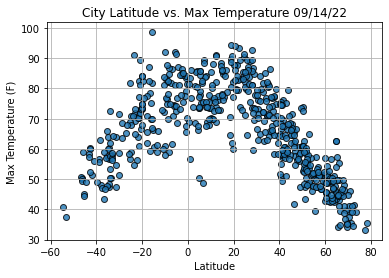

In [28]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temp,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

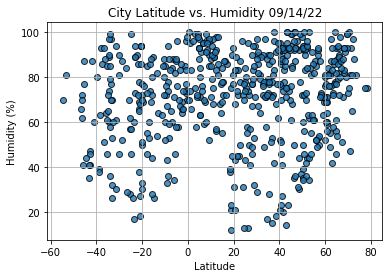

In [29]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

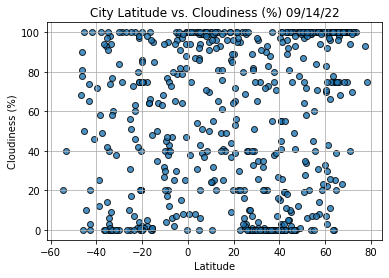

In [30]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

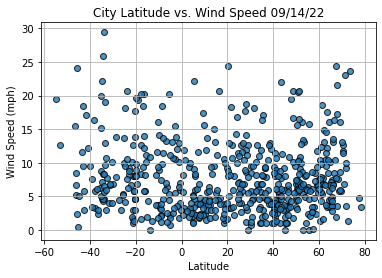

In [31]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [32]:
# Import linregress
from scipy.stats import linregress

# Create a function to perform linear regression on the weather data and plot a regression line and the equation with the data
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):
    
    # Run regression on hemisphere weather data
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)
    
    # Calculate the regression line "y values" from the slope and intercept
    regress_values = x_values*slope + intercept
    # Get the equation of the line 
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regress_values, "r")
    
    # Annotate the text for the line equation 
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [37]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Longyearbyen,SJ,2022-09-14 03:49:44,78.2186,15.6401,35.44,75,75,3.44
3,Butaritari,KI,2022-09-14 03:53:37,3.0707,172.7902,80.89,75,8,9.37
4,Saint George,US,2022-09-14 03:52:47,37.1041,-113.5841,72.63,72,0,4.61
6,Qaanaaq,GL,2022-09-14 03:49:04,77.4840,-69.3632,33.22,75,93,4.70
9,Hilo,US,2022-09-14 03:48:56,19.7297,-155.0900,82.13,81,20,9.22


In [36]:
# Create Northern and Southern Hemisphere DataFrames
nothern_hemi_df = city_data_df.loc[(city_data_df['Lat']>=0)]
southern_hemi_df = city_data_df.loc[(city_data_df['Lat']<0)].

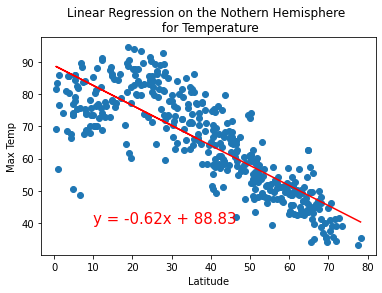

In [38]:
# Linear regression on the Northen Hemisphere
x_values = nothern_hemi_df['Lat']
y_values = nothern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for Temperature', 'Max Temp',(10,40))

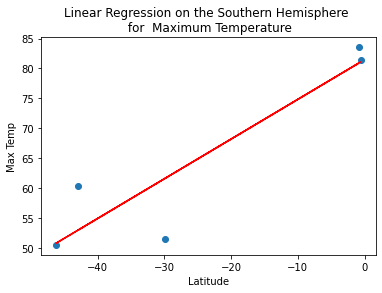

In [53]:
# Linear regression on the Northen Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for  Maximum Temperature', 'Max Temp', (-50,50))

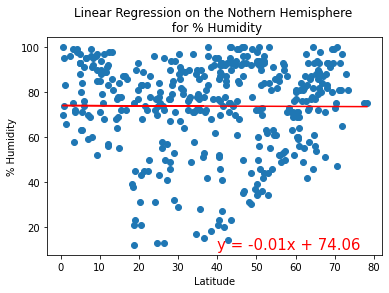

In [45]:
# Linear regression on the Northen Hemisphere
x_values = nothern_hemi_df['Lat']
y_values = nothern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for % Humidity', '% Humidity', (40,10))

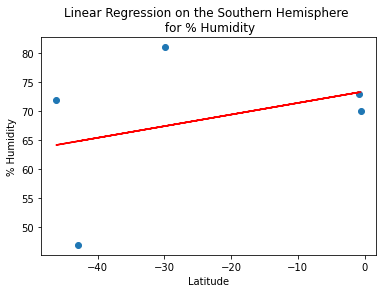

In [46]:
# Linear regression on the Northen Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity', (-50,15))

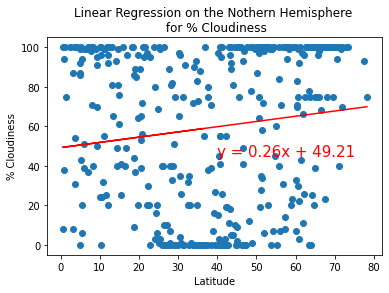

In [47]:
# Linear regression on the Northen Hemisphere
x_values = nothern_hemi_df['Lat']
y_values = nothern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for % Cloudiness', '% Cloudiness', (40,45))

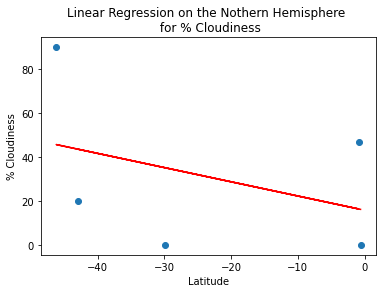

In [50]:
# Linear regression on the Northen Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for % Cloudiness', '% Cloudiness', (-50,60))

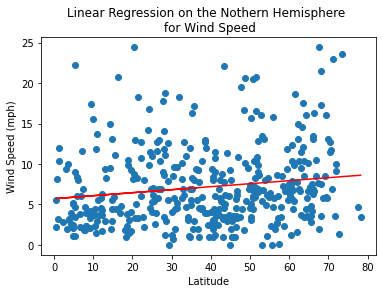

In [51]:
# Linear regression on the Northen Hemisphere
x_values = nothern_hemi_df['Lat']
y_values = nothern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (0,28))

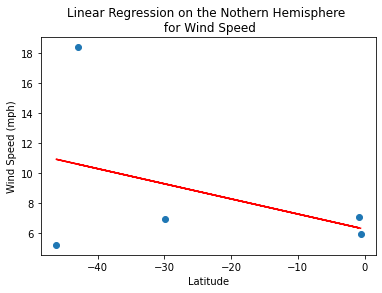

In [52]:
# Linear regression on the Northen Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

# Call the function
plot_linear_regression(x_values, y_values, 'Linear Regression on the Nothern Hemisphere \n for Wind Speed', 'Wind Speed (mph)', (-50,25))